In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
from sklearn.datasets import make_classification

# Задание 1

## Создание и визуализация датасетов

In [3]:
data1, data1_y, = make_classification(n_samples=100, n_classes=2, n_features=2, n_redundant=0, n_clusters_per_class=1, flip_y=0, random_state=100)
data2, data2_y, = make_classification(n_samples=300, n_classes=3, n_features=4, n_redundant=0, n_clusters_per_class=1, flip_y=0, random_state=200)
data3, data3_y, = make_classification(n_samples=500, n_classes=4, n_features=3, n_redundant=0, n_clusters_per_class=1, flip_y=0,random_state=300)

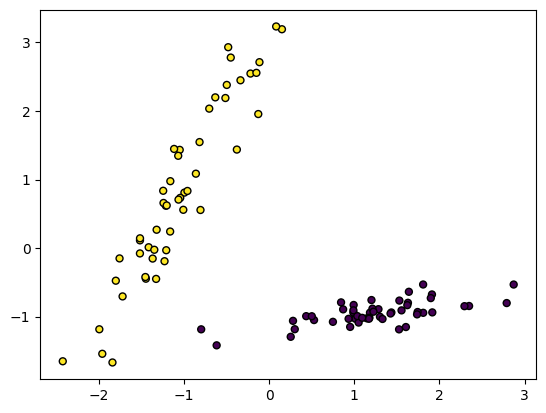

In [4]:
plt.scatter(data1[:, 0], data1[:, 1], marker="o", c=data1_y, s=25, edgecolor="k")
plt.show()

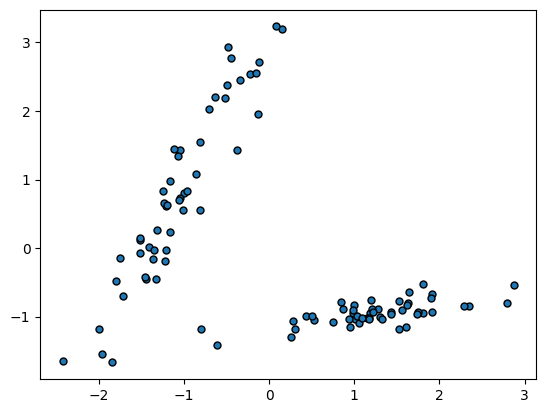

In [5]:
plt.scatter(data1[:, 0], data1[:, 1], marker="o", s=25, edgecolor="k")
plt.show()

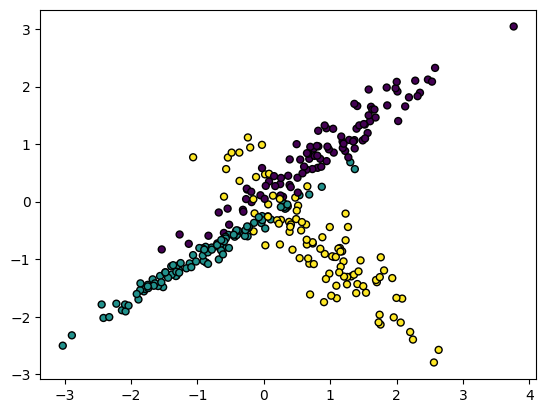

In [6]:
plt.scatter(data2[:, 0], data2[:, 1], marker="o", c=data2_y, s=25, edgecolor="k")
plt.show()

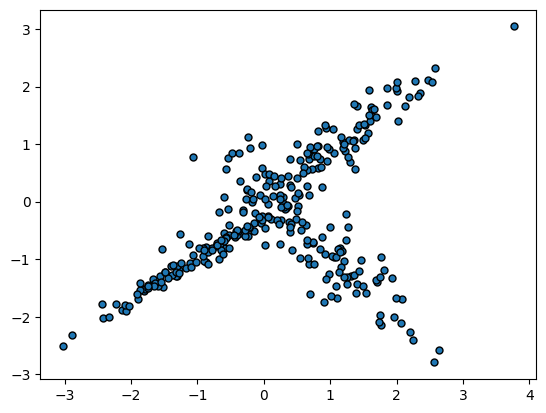

In [7]:
plt.scatter(data2[:, 0], data2[:, 1], marker="o", s=25, edgecolor="k")
plt.show()

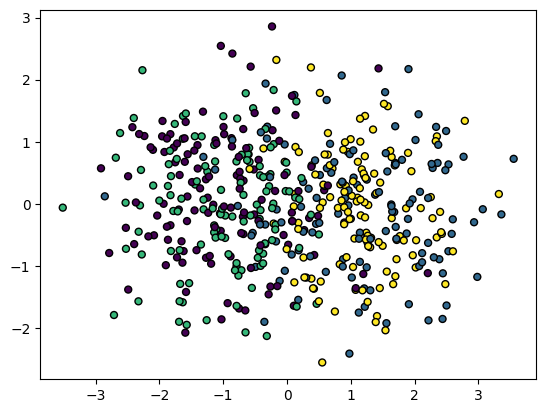

In [8]:
plt.scatter(data3[:, 0], data3[:, 1], marker="o", c=data3_y, s=25, edgecolor="k")
plt.show()

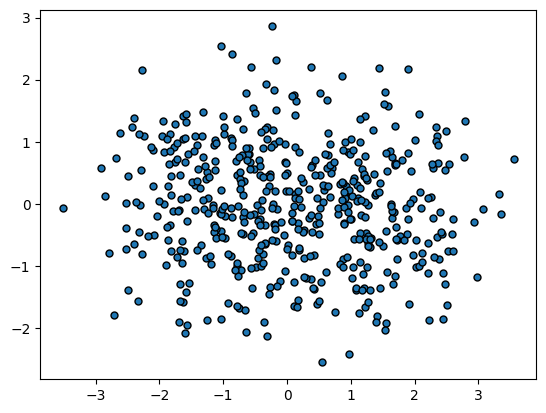

In [9]:
plt.scatter(data3[:, 0], data3[:, 1], marker="o", s=25, edgecolor="k")
plt.show()

## Провести кластеризацию. Для каждого метода подобрать гиперпараметры. Каждый метод оценить двумя внешними и двумя внутренними метриками

### K-maens

In [10]:
from sklearn.cluster import KMeans

kmeans1 = KMeans(2, n_init='auto').fit(data1)

In [11]:
from sklearn.metrics.cluster import rand_score, fowlkes_mallows_score, silhouette_score, davies_bouldin_score
# 1,2 внешние   3,4 внутренние

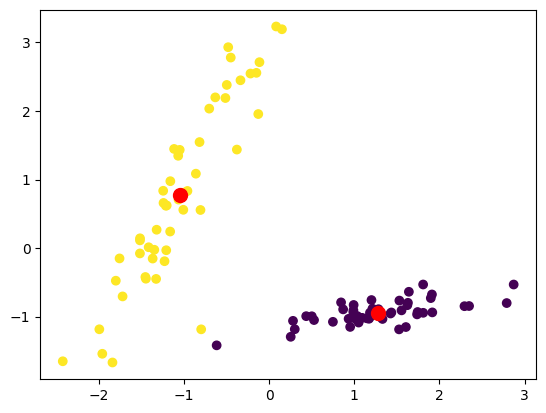

In [12]:
plt.scatter(data1[:,0], data1[:,1], c=kmeans1.labels_)
plt.scatter(kmeans1.cluster_centers_[:,0], kmeans1.cluster_centers_[:,1], s=100, c='red')

In [13]:
print(silhouette_score(data1, kmeans1.labels_))
print(davies_bouldin_score(data1, kmeans1.labels_))
print(rand_score(data1_y,kmeans1.labels_))
print(fowlkes_mallows_score(data1_y,kmeans1.labels_))

0.6200103946540423
0.5773266272596074
0.98
0.9798000612036726


In [14]:
kmeans2 = KMeans(3, n_init='auto').fit(data2)
kmeans3 = KMeans(4, n_init='auto').fit(data3)

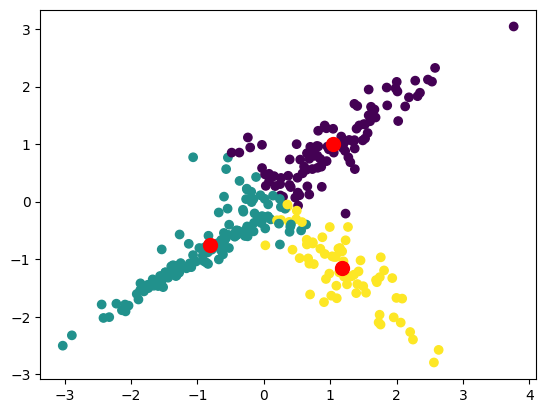

In [15]:
plt.scatter(data2[:,0], data2[:,1], c=kmeans2.labels_)
plt.scatter(kmeans2.cluster_centers_[:,0], kmeans2.cluster_centers_[:,1], s=100, c='red')

In [16]:
print(silhouette_score(data2, kmeans2.labels_))
print(davies_bouldin_score(data2, kmeans2.labels_))
print(rand_score(data2_y,kmeans2.labels_))
print(fowlkes_mallows_score(data2_y,kmeans2.labels_))

0.24406175260315127
1.4127143366962083
0.782118171683389
0.6816570448314749


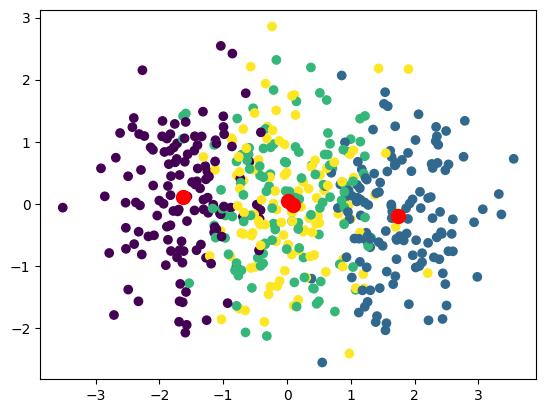

In [17]:
plt.scatter(data3[:,0], data3[:,1], c=kmeans3.labels_)
plt.scatter(kmeans3.cluster_centers_[:,0], kmeans3.cluster_centers_[:,1], s=100, c='red')

In [18]:
print(silhouette_score(data3, kmeans3.labels_))
print(davies_bouldin_score(data3, kmeans3.labels_))
print(rand_score(data3_y,kmeans3.labels_))
print(fowlkes_mallows_score(data3_y,kmeans3.labels_))

0.29409553099688424
1.0872518980401293
0.7450100200400802
0.4876796877168009


Подберём количество кластеров методом локтя и силуета для каждого набора

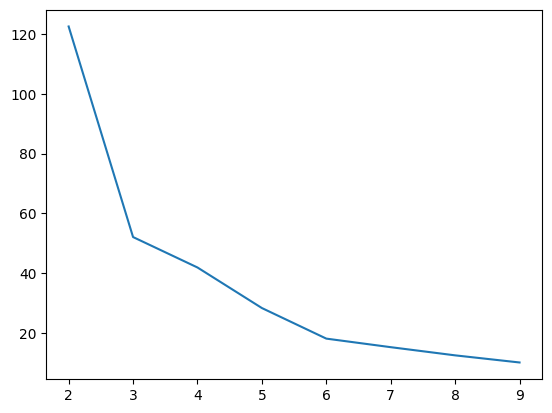

In [19]:
inertias = []

for i in range(2, 10):
  m = KMeans(i, n_init='auto').fit(data1)
  inertias.append(m.inertia_)

plt.plot(range(2,10), inertias)

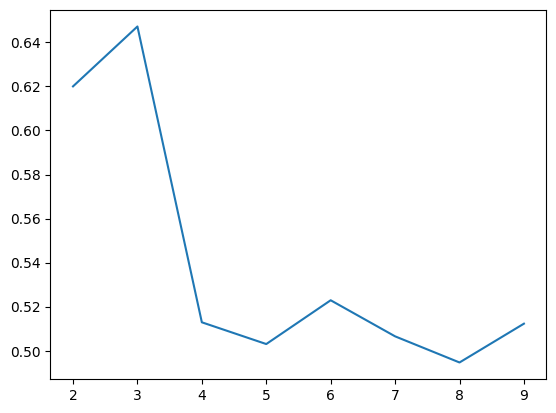

In [20]:
ss = []

for i in range(2, 10):
  ss.append(silhouette_score(data1, KMeans(i, n_init='auto').fit(data1).labels_))

plt.plot(range(2,10), ss)

Для первого набора данных число кластеров остаётся 2

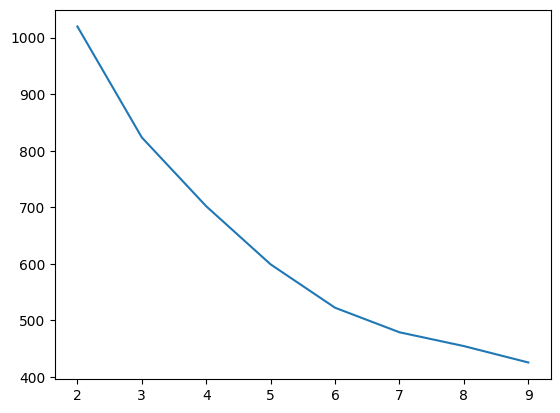

In [21]:
inertias = []

for i in range(2, 10):
  m = KMeans(i, n_init='auto').fit(data2)
  inertias.append(m.inertia_)

plt.plot(range(2,10), inertias)

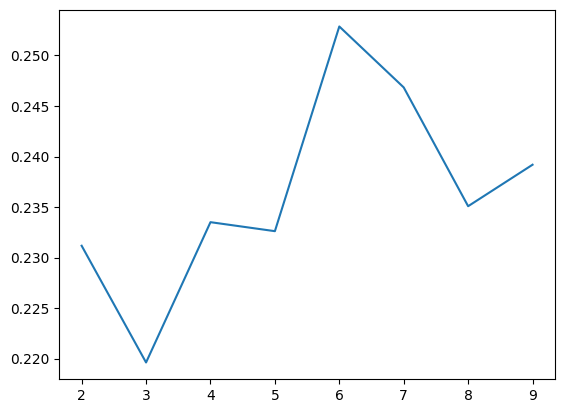

In [22]:
ss = []

for i in range(2, 10):
  ss.append(silhouette_score(data2, KMeans(i, n_init='auto').fit(data2).labels_))

plt.plot(range(2,10), ss)

Показатели также оптимальны при изначальном числе классов

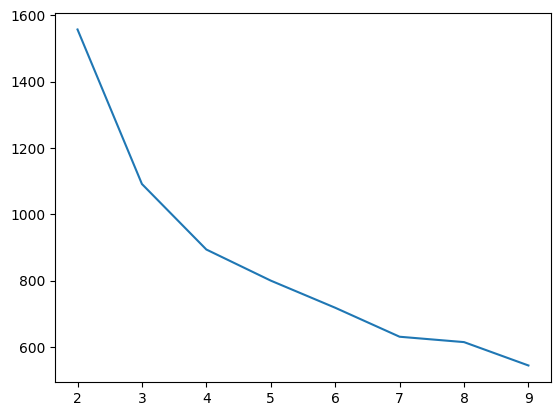

In [23]:
inertias = []

for i in range(2, 10):
  m = KMeans(i, n_init='auto').fit(data3)
  inertias.append(m.inertia_)

plt.plot(range(2,10), inertias)

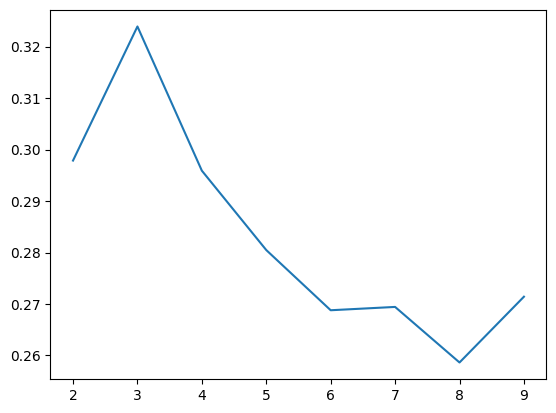

In [24]:
ss = []

for i in range(2, 10):
  ss.append(silhouette_score(data3, KMeans(i, n_init='auto').fit(data3).labels_))

plt.plot(range(2,10), ss)

Для третьего набора оптимальной является модель с 3 кластерами, перестроим её

In [25]:
kmeans3 = KMeans(3, n_init='auto').fit(data3)

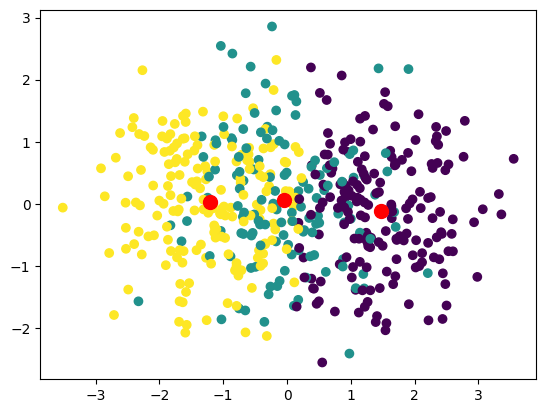

In [26]:
plt.scatter(data3[:,0], data3[:,1], c=kmeans3.labels_)
plt.scatter(kmeans3.cluster_centers_[:,0], kmeans3.cluster_centers_[:,1], s=100, c='red')

In [27]:
print(silhouette_score(data3, kmeans3.labels_))
print(davies_bouldin_score(data3, kmeans3.labels_))
print(rand_score(data3_y,kmeans3.labels_))
print(fowlkes_mallows_score(data3_y,kmeans3.labels_))

0.32151779616824117
1.0469220179403627
0.7381563126252505
0.560850343005463


Видно что метрики по большей части улучшились

### AffinityPropagation

In [28]:
from sklearn.cluster import AffinityPropagation

In [29]:
from sklearn.model_selection import GridSearchCV

In [30]:
clustering = AffinityPropagation(random_state=42)
clustering_params = {'preference': list(range(-50, 50))}

In [31]:
gridSearch = GridSearchCV(clustering, clustering_params,scoring='rand_score').fit(data1, data1_y)

D:\ML-Labs\venv\lib\site-packages\sklearn\cluster\_affinity_propagation.py:143: ConvergenceWarning: Affinity propagation did not converge, this model may return degenerate cluster centers and labels.
  warnings.warn(
D:\ML-Labs\venv\lib\site-packages\sklearn\cluster\_affinity_propagation.py:143: ConvergenceWarning: Affinity propagation did not converge, this model may return degenerate cluster centers and labels.
  warnings.warn(
D:\ML-Labs\venv\lib\site-packages\sklearn\cluster\_affinity_propagation.py:143: ConvergenceWarning: Affinity propagation did not converge, this model may return degenerate cluster centers and labels.
  warnings.warn(
D:\ML-Labs\venv\lib\site-packages\sklearn\cluster\_affinity_propagation.py:143: ConvergenceWarning: Affinity propagation did not converge, this model may return degenerate cluster centers and labels.
  warnings.warn(
D:\ML-Labs\venv\lib\site-packages\sklearn\cluster\_affinity_propagation.py:143: ConvergenceWarning: Affinity propagation did not con

In [32]:
gridSearch.best_params_

{'preference': -34}

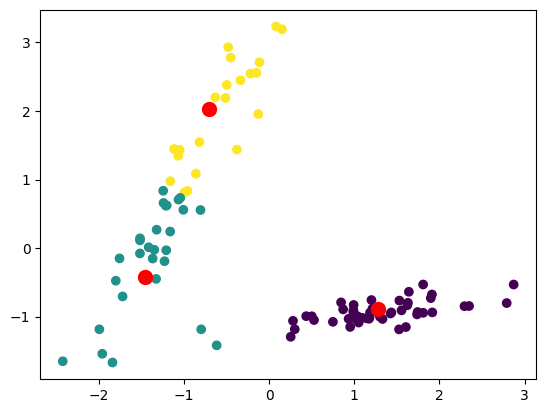

In [33]:
clustering1 = AffinityPropagation(preference=-34).fit(data1)

plt.scatter(data1[:,0], data1[:,1], c=clustering1.labels_)
plt.scatter(clustering1.cluster_centers_[:,0], clustering1.cluster_centers_[:,1], s=100, c='red')

In [34]:
print(silhouette_score(data1,clustering1.labels_))
print(davies_bouldin_score(data1, clustering1.labels_))
print(rand_score(data1_y,clustering1.labels_))
print(fowlkes_mallows_score(data1_y,clustering1.labels_))

0.6262606149369205
0.551575832043458
0.8448484848484848
0.8290018707180579


In [35]:
gridSearch = GridSearchCV(clustering, clustering_params,scoring='rand_score').fit(data2, data2_y)

In [36]:
gridSearch.best_params_

{'preference': -36}

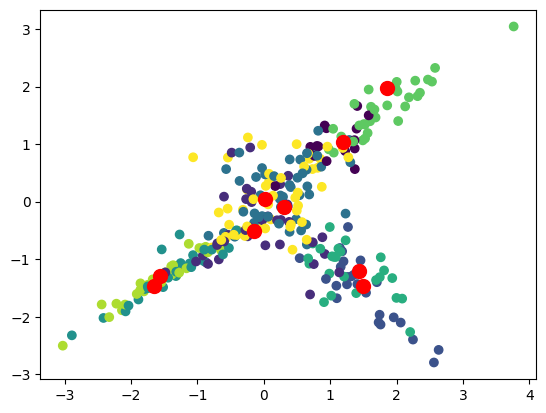

In [37]:
clustering2 = AffinityPropagation(preference=-36).fit(data2)

plt.scatter(data2[:,0], data2[:,1], c=clustering2.labels_)
plt.scatter(clustering2.cluster_centers_[:,0], clustering2.cluster_centers_[:,1], s=100, c='red')

In [38]:
print(silhouette_score(data2,clustering2.labels_))
print(davies_bouldin_score(data2, clustering2.labels_))
print(rand_score(data2_y,clustering2.labels_))
print(fowlkes_mallows_score(data2_y,clustering2.labels_))

0.22356550000948408
1.2142923889149952
0.6868450390189521
0.34638759493478277


In [39]:
gridSearch = GridSearchCV(clustering, clustering_params,scoring='rand_score').fit(data3, data3_y)

In [40]:
gridSearch.best_params_

{'preference': -50}

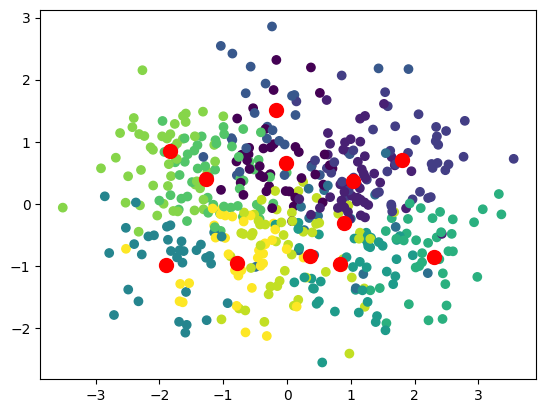

In [41]:
clustering3 = AffinityPropagation(preference=-36).fit(data3)

plt.scatter(data3[:,0], data3[:,1], c=clustering3.labels_)
plt.scatter(clustering3.cluster_centers_[:,0], clustering3.cluster_centers_[:,1], s=100, c='red')

In [42]:
print(silhouette_score(data3,clustering3.labels_))
print(davies_bouldin_score(data3, clustering3.labels_))
print(rand_score(data3_y,clustering3.labels_))
print(fowlkes_mallows_score(data3_y,clustering3.labels_))

0.22568630579547852
1.1225905518955168
0.7688336673346693
0.35448464348502046


Пока можно сделать вывод что K-means справляется лучше

### DB-SCAN

In [43]:
from sklearn.cluster import DBSCAN

In [44]:
from sklearn.neighbors import NearestNeighbors

In [45]:
nbrs = NearestNeighbors(n_neighbors=4).fit(data1)
distances, indices = nbrs.kneighbors(data1)

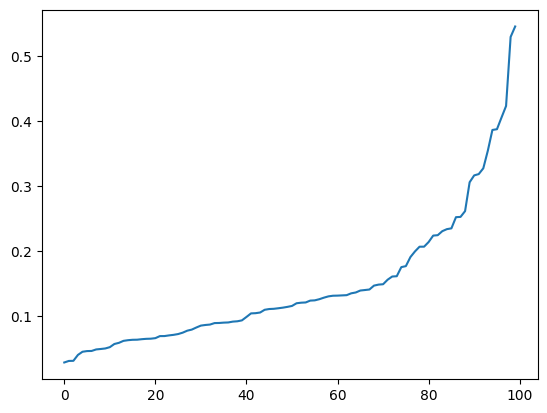

In [46]:
distances = np.mean(distances, axis=1)
distances = np.sort(distances)
# distances
plt.plot(distances)

[-1  0  1  2]


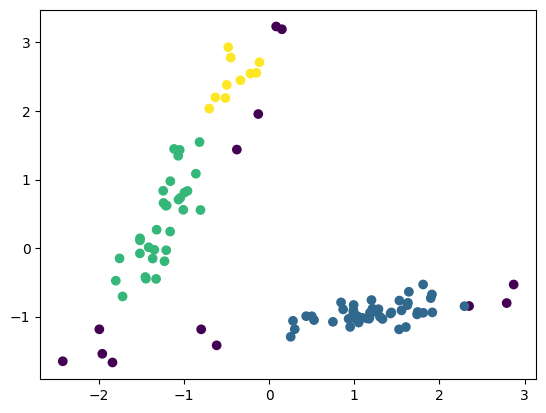

In [47]:
dbscan1 = DBSCAN(eps=0.4, min_samples=4).fit(data1)
print(np.unique(dbscan1.labels_))
plt.scatter(data1[:,0], data1[:,1], c=dbscan1.labels_)

In [48]:
print(silhouette_score(data1,dbscan1.labels_))
print(davies_bouldin_score(data1, dbscan1.labels_))

print(rand_score(dbscan1.labels_, data1_y))
print(fowlkes_mallows_score(dbscan1.labels_, data1_y))

0.5491012754618697
1.942205768640852
0.813939393939394
0.7902452232328284


In [49]:
nbrs = NearestNeighbors(n_neighbors=4).fit(data2)
distances, indices = nbrs.kneighbors(data2)

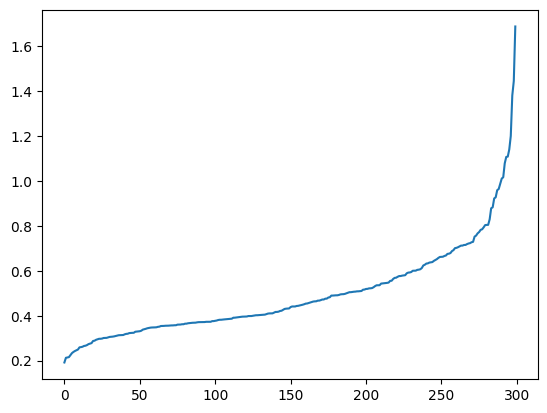

In [50]:
distances = np.mean(distances, axis=1)
distances = np.sort(distances)
# distances
plt.plot(distances)

In [ ]:
dbscan2 = DBSCAN(eps=0.6, min_samples=4).fit(data2)
print(np.unique(dbscan2.labels_))
plt.scatter(data2[:,0], data2[:,1], c=dbscan2.labels_)

In [52]:
print(silhouette_score(data2,dbscan2.labels_))
print(davies_bouldin_score(data2, dbscan2.labels_))

print(rand_score(dbscan2.labels_, data2_y))
print(fowlkes_mallows_score(dbscan2.labels_, data2_y))

-0.20278758031672747
2.138636847295536
0.5912374581939799
0.3561047130476715


In [53]:
nbrs = NearestNeighbors(n_neighbors=4).fit(data3)
distances, indices = nbrs.kneighbors(data3)

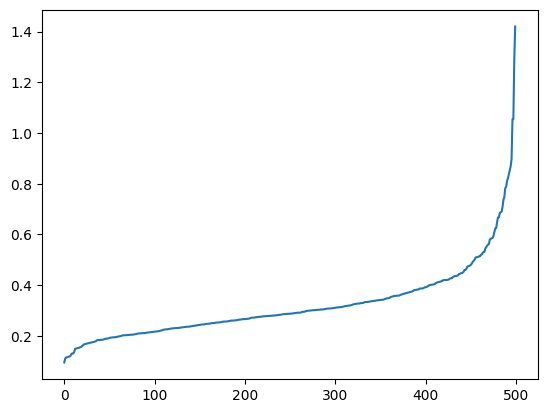

In [54]:
distances = np.mean(distances, axis=1)
distances = np.sort(distances)
# distances
plt.plot(distances)

In [ ]:
dbscan3 = DBSCAN(eps=0.4, min_samples=4).fit(data3)
print(np.unique(dbscan3.labels_))
plt.scatter(data3[:,0], data3[:,1], c=dbscan3.labels_)

In [57]:
print(silhouette_score(data3,dbscan3.labels_))
print(davies_bouldin_score(data3, dbscan3.labels_))

print(rand_score(dbscan3.labels_, data3_y))
print(fowlkes_mallows_score(dbscan3.labels_, data3_y))

-0.177398523909959
1.6552413664150964
0.6487935871743487
0.3049828132547358


### GaussianMixture


In [58]:
from sklearn.mixture import GaussianMixture

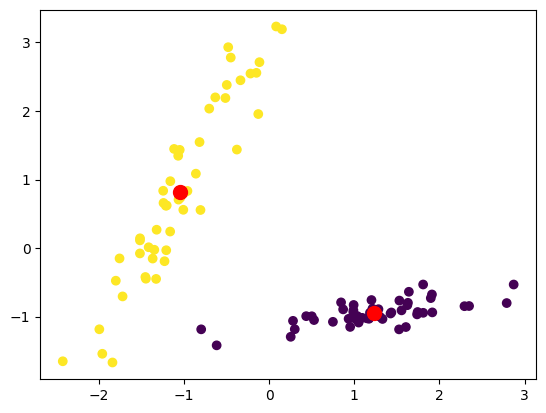

In [59]:
gm1 = GaussianMixture(n_components=2).fit(data1)

gm1_pred = gm1.predict(data1)

plt.scatter(data1[:,0], data1[:,1], c=gm1_pred)
plt.scatter(gm1.means_[:,0], gm1.means_[:,1], s=100, c='red')

In [60]:
print(silhouette_score(data1,gm1_pred))
print(davies_bouldin_score(data1, gm1_pred))
print(rand_score(data1_y,gm1_pred))
print(fowlkes_mallows_score(data1_y,gm1_pred))

0.6179207500580006
0.5833862612573297
1.0
1.0


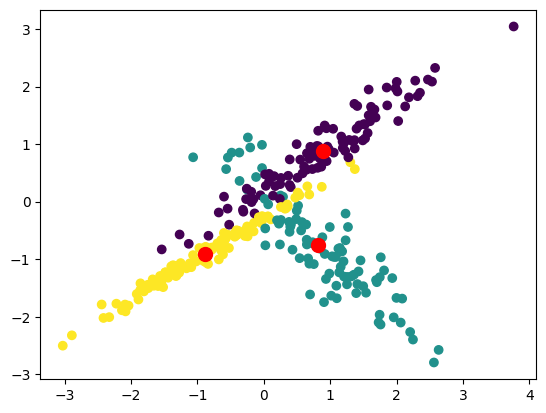

In [61]:
gm2 = GaussianMixture(n_components=3).fit(data2)

gm2_pred = gm2.predict(data2)

plt.scatter(data2[:,0], data2[:,1], c=gm2_pred)
plt.scatter(gm2.means_[:,0], gm2.means_[:,1], s=100, c='red')

In [62]:
print(silhouette_score(data2,gm2_pred))
print(davies_bouldin_score(data2, gm2_pred))
print(rand_score(data2_y,gm2_pred))
print(fowlkes_mallows_score(data2_y,gm2_pred))

0.16240394847141976
1.9166555415072744
0.9085172798216277
0.8621180584387498


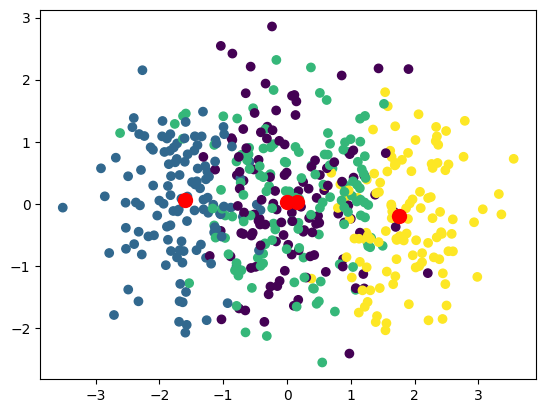

In [63]:
gm3 = GaussianMixture(n_components=4).fit(data3)

gm3_pred = gm3.predict(data3)

plt.scatter(data3[:,0], data3[:,1], c=gm3_pred)
plt.scatter(gm3.means_[:,0], gm3.means_[:,1], s=100, c='red')

In [64]:
print(silhouette_score(data3,gm3_pred))
print(davies_bouldin_score(data3, gm3_pred))
print(rand_score(data3_y,gm3_pred))
print(fowlkes_mallows_score(data3_y,gm3_pred))

0.29204435645710985
1.0620683394220645
0.7422605210420842
0.4837479593110443


### Иерархическая кластеризация

In [65]:
from scipy.cluster import hierarchy

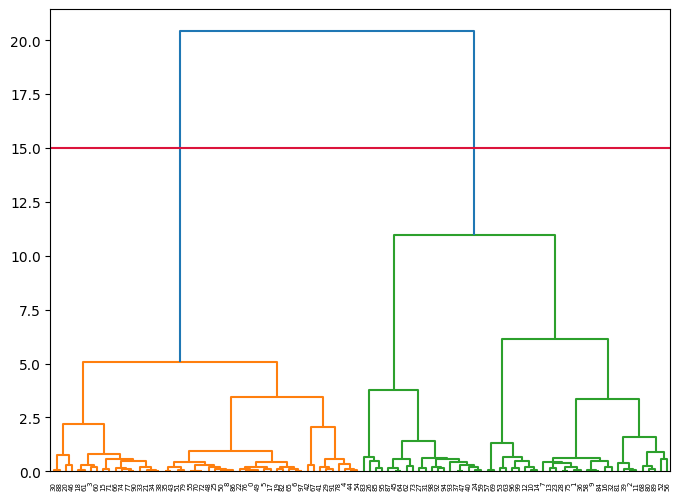

In [66]:
clusters1 = hierarchy.linkage(data1, method="ward")

plt.figure(figsize=(8, 6))
dendrogram1 = hierarchy.dendrogram(clusters1)
plt.axhline(25, color='red', linestyle='--');
plt.axhline(15, color='crimson');

In [67]:
from sklearn.cluster import AgglomerativeClustering

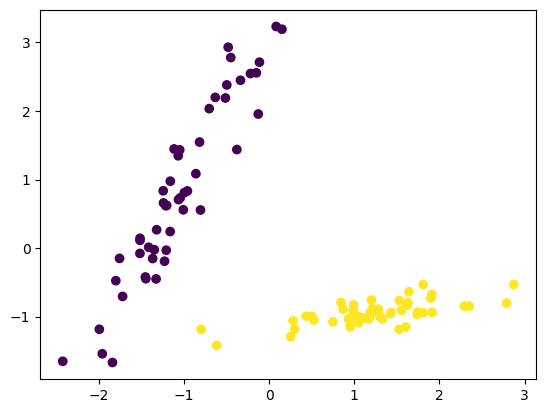

In [68]:
clustering1 = AgglomerativeClustering(n_clusters=2, linkage="ward").fit(data1)
plt.scatter(data1[:,0], data1[:,1], c=clustering1.labels_)

In [69]:
print(silhouette_score(data1,clustering1.labels_))
print(davies_bouldin_score(data1, clustering1.labels_))
print(rand_score(data1_y,clustering1.labels_))
print(fowlkes_mallows_score(data1_y,clustering1.labels_))

0.6179207500580006
0.5833862612573297
1.0
1.0


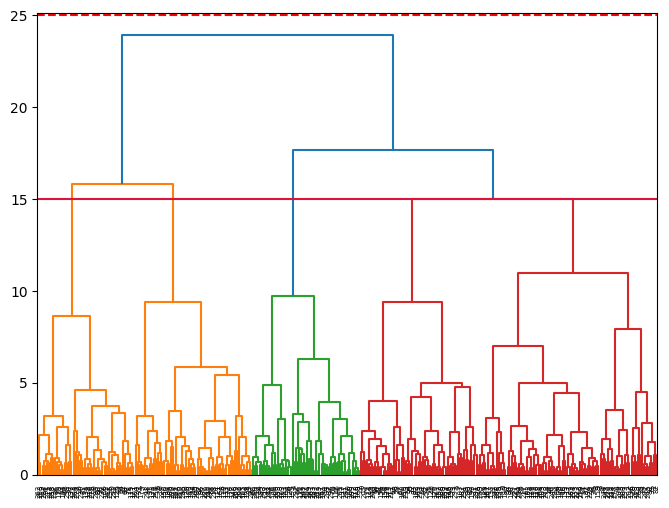

In [70]:
clusters2 = hierarchy.linkage(data2, method="ward")

plt.figure(figsize=(8, 6))
dendrogram2 = hierarchy.dendrogram(clusters2)
plt.axhline(25, color='red', linestyle='--');
plt.axhline(15, color='crimson');

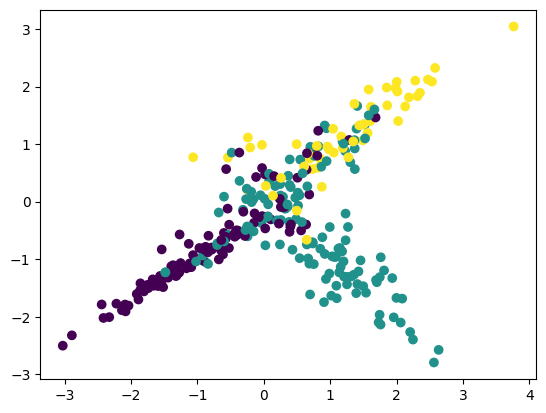

In [71]:
clustering2 = AgglomerativeClustering(n_clusters=3, linkage="ward").fit(data2)
plt.scatter(data2[:,0], data2[:,1], c=clustering2.labels_)

In [72]:
print(silhouette_score(data2,clustering2.labels_))
print(davies_bouldin_score(data2, clustering2.labels_))
print(rand_score(data2_y,clustering2.labels_))
print(fowlkes_mallows_score(data2_y,clustering2.labels_))

0.18238602312092353
1.6705765958864927
0.6494091415830546
0.5071042785102353


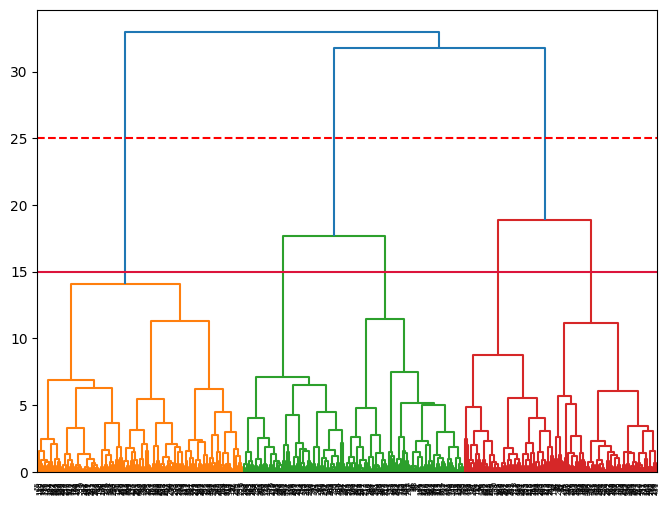

In [73]:
clusters3 = hierarchy.linkage(data3, method="ward")

plt.figure(figsize=(8, 6))
dendrogram3 = hierarchy.dendrogram(clusters3)
plt.axhline(25, color='red', linestyle='--');
plt.axhline(15, color='crimson');

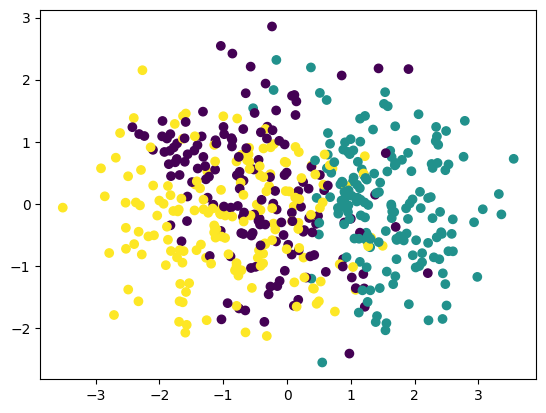

In [74]:
clustering3 = AgglomerativeClustering(n_clusters=3, linkage="ward").fit(data3)
plt.scatter(data3[:,0], data3[:,1], c=clustering3.labels_)

In [75]:
print(silhouette_score(data3,clustering3.labels_))
print(davies_bouldin_score(data3, clustering3.labels_))
print(rand_score(data3_y,clustering3.labels_))
print(fowlkes_mallows_score(data3_y,clustering3.labels_))

0.2715315703005135
1.1894679183159653
0.7330661322645291
0.5467304081986826


### Карты Кохонена

In [76]:
!pip install sklearn_som

You should consider upgrading via the 'D:\ML-Labs\venv\Scripts\python.exe -m pip install --upgrade pip' command.


In [77]:
from sklearn_som.som import SOM

In [78]:
som1 = SOM(m=2, n=1, dim=2)
som1.fit(data1)
pred1 = som1.predict(data1)

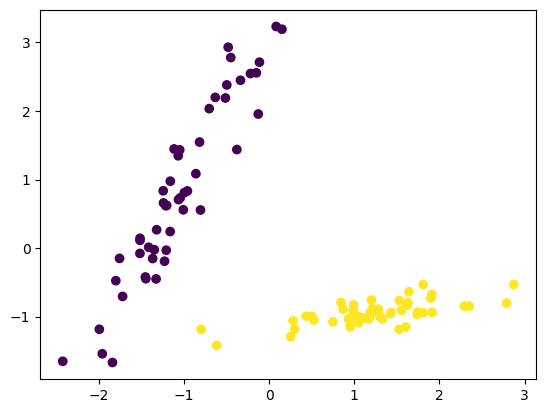

In [79]:
plt.scatter(data1[:,0], data1[:,1], c=pred1)

In [80]:
print(silhouette_score(data1,pred1))
print(davies_bouldin_score(data1, pred1))
print(rand_score(data1_y,pred1))
print(fowlkes_mallows_score(data1_y,pred1))

0.6179207500580006
0.5833862612573297
1.0
1.0


In [81]:
som2 = SOM(m=2, n=2, dim=4)
som2.fit(data2)
pred2 = som2.predict(data2)

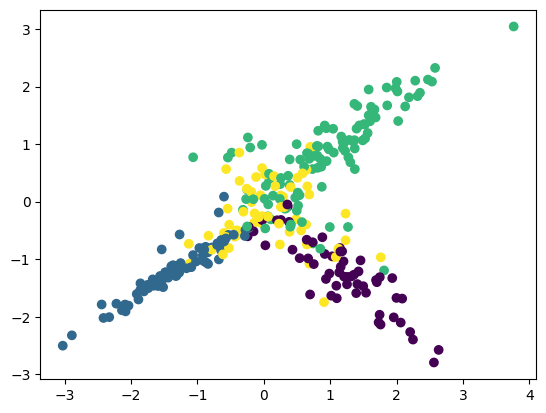

In [82]:
plt.scatter(data2[:,0], data2[:,1], c=pred2)

In [83]:
print(silhouette_score(data2,pred2))
print(davies_bouldin_score(data2, pred2))
print(rand_score(data2_y,pred2))
print(fowlkes_mallows_score(data2_y,pred2))

0.20506582245056923
1.469319440290914
0.726510590858417
0.5450752226946194


In [84]:
som3 = SOM(m=2, n=2, dim=3)
som3.fit(data3)
pred3 = som3.predict(data3)

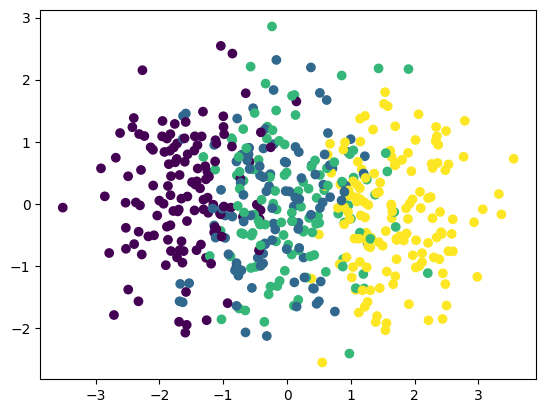

In [85]:
plt.scatter(data3[:,0], data3[:,1], c=pred3)

In [86]:
print(silhouette_score(data3,pred3))
print(davies_bouldin_score(data3, pred3))
print(rand_score(data3_y,pred3))
print(fowlkes_mallows_score(data3_y,pred3))

0.2932907048218598
1.0997982340036818
0.7491382765531062
0.4979941774129529


### Реализация K-means

In [121]:
class kmeans:
    def __init__(self, n_clusters, max_iters=100):
        self.n_clusters = n_clusters
        self.max_iters = max_iters

    def initialize_centroids(self, X):
        centroids_idx = np.random.choice(range(X.shape[0]), size=self.n_clusters, replace=False)
        centroids = X[centroids_idx]
        return centroids

    def assign_clusters(self, X, centroids):
        distance_matrix = np.zeros((X.shape[0], self.n_clusters))
        for i, centroid in enumerate(centroids):
            distance_matrix[:, i] = np.linalg.norm(X - centroid, axis=1)
        cluster_labels = np.argmin(distance_matrix, axis=1)
        return cluster_labels

    def update_centroids(self, X, cluster_labels):
        centroids = np.zeros((self.n_clusters, X.shape[1]))
        for i in range(self.n_clusters):
            centroids[i] = np.mean(X[cluster_labels == i], axis=0)
        return centroids

    def fit(self, X):
        centroids = self.initialize_centroids(X)
        for _ in range(self.max_iters):
            cluster_labels = self.assign_clusters(X, centroids)
            new_centroids = self.update_centroids(X, cluster_labels)
            if np.allclose(new_centroids, centroids):
                break
            centroids = new_centroids
        return [centroids, cluster_labels]

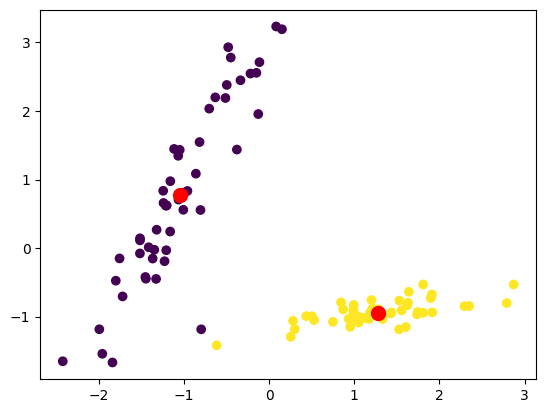

In [123]:
km = kmeans(n_clusters=2)
predictions=km.fit(data1)
cluster_labels=predictions[1]
centroids=predictions[0]
plt.scatter(data1[:,0], data1[:,1], c=cluster_labels)
plt.scatter(centroids[:,0], centroids[:,1], s=100, c='red')

In [124]:
print(silhouette_score(data1,cluster_labels))
print(davies_bouldin_score(data1,cluster_labels))
print(rand_score(data1_y,cluster_labels))
print(fowlkes_mallows_score(data1_y,cluster_labels))

0.6200103946540423
0.5773266272596074
0.98
0.9798000612036726


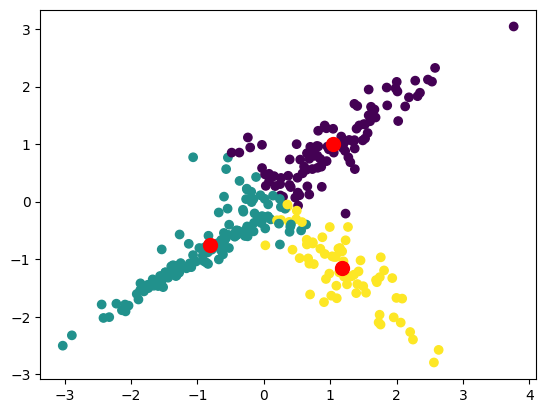

In [125]:
km = kmeans(n_clusters=3)
predictions=km.fit(data2)
cluster_labels=predictions[1]
centroids=predictions[0]
plt.scatter(data2[:,0], data2[:,1], c=cluster_labels)
plt.scatter(centroids[:,0], centroids[:,1], s=100, c='red')

In [126]:
print(silhouette_score(data2,cluster_labels))
print(davies_bouldin_score(data2,cluster_labels))
print(rand_score(data2_y,cluster_labels))
print(fowlkes_mallows_score(data2_y,cluster_labels))

0.24406175260315127
1.4127143366962083
0.782118171683389
0.6816570448314749


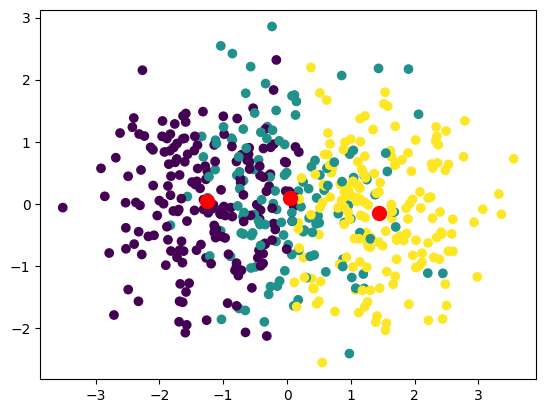

In [127]:
km = kmeans(n_clusters=3)
predictions=km.fit(data3)
cluster_labels=predictions[1]
centroids=predictions[0]
plt.scatter(data3[:,0], data3[:,1], c=cluster_labels)
plt.scatter(centroids[:,0], centroids[:,1], s=100, c='red')

In [128]:
print(silhouette_score(data3,cluster_labels))
print(davies_bouldin_score(data3,cluster_labels))
print(rand_score(data3_y,cluster_labels))
print(fowlkes_mallows_score(data3_y,cluster_labels))

0.3227564959507948
1.0494693032674645
0.7420200400801603
0.566840300834117


## Задание 2

In [143]:
data0= pd.read_csv('D:\ML\data\diabetes.csv')
data0=data0.astype(int)
data0.drop_duplicates()
data0_y=data0["Diabetes_012"]
data0.pop("Diabetes_012")
data0.head()

,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,1,1,1,40,1,0,0,0,0,1,...,1,0,5,18,15,1,0,9,4,3
1,0,0,0,25,1,0,0,1,0,0,...,0,1,3,0,0,0,0,7,6,1
2,1,1,1,28,0,0,0,0,1,0,...,1,1,5,30,30,1,0,9,4,8
3,1,0,1,27,0,0,0,1,1,1,...,1,0,2,0,0,0,0,11,3,6
4,1,1,1,24,0,0,0,1,1,1,...,1,0,2,3,0,0,0,11,5,4


In [151]:
from sklearn.model_selection import train_test_split

In [154]:
x_train, x_test,y_train,y_test = train_test_split(data0,data0_y, test_size=0.9,stratify=data0_y)

In [155]:
kmeans0 = KMeans(3, n_init='auto').fit(x_train)

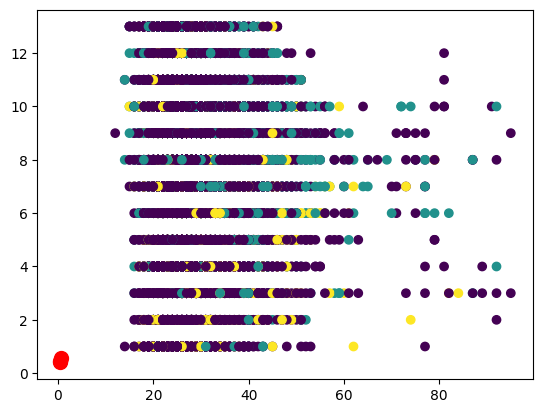

In [156]:
plt.scatter(np.array(x_train)[:,3], np.array(x_train)[:,-3], c=kmeans0.labels_)
plt.scatter(kmeans0.cluster_centers_[:,0], kmeans0.cluster_centers_[:,1], s=100, c='red')

In [159]:
print(silhouette_score(x_train, kmeans0.labels_))
print(davies_bouldin_score(x_train, kmeans0.labels_))
print(rand_score(y_train,kmeans0.labels_))
print(fowlkes_mallows_score(y_train,kmeans0.labels_))

0.552495292759018
0.9225667510419323
0.6351527846209757
0.7448614898741986


In [160]:
nbrs = NearestNeighbors(n_neighbors=4).fit(x_train)
distances, indices = nbrs.kneighbors(x_train)

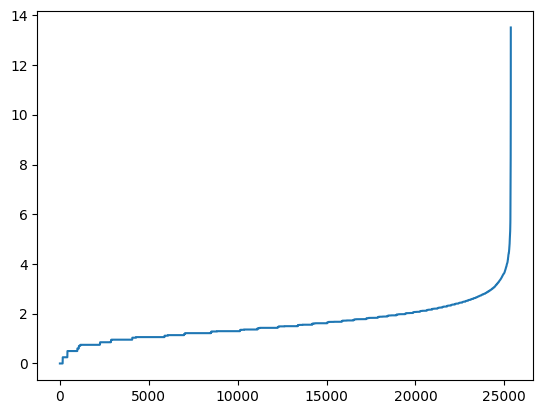

In [161]:
distances = np.mean(distances, axis=1)
distances = np.sort(distances)
# distances
plt.plot(distances)

[-1  0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22
 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46
 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70
 71 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94
 95 96]


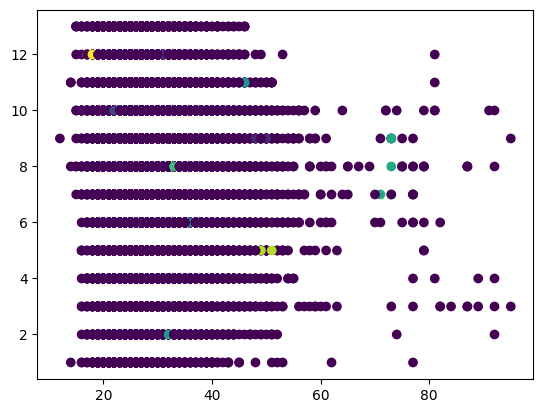

In [165]:
dbscan0 = DBSCAN(eps=2.5, min_samples=4).fit(x_train)
print(np.unique(dbscan0.labels_))
plt.scatter(np.array(x_train)[:,3], np.array(x_train)[:,-3], c=dbscan0.labels_)

In [167]:
print(silhouette_score(x_train, dbscan0.labels_))
print(davies_bouldin_score(x_train,dbscan0.labels_))
print(rand_score(y_train,dbscan0.labels_))
print(fowlkes_mallows_score(y_train,dbscan0.labels_))

-0.3717573052036847
1.3622867253362734
0.5645988506510612
0.6645422436976257


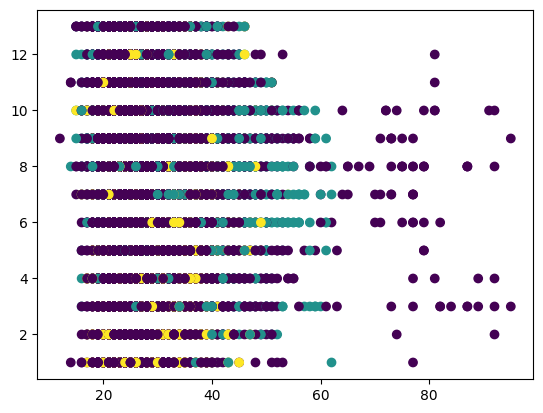

In [170]:
clustering0 = AgglomerativeClustering(n_clusters=3, linkage="ward").fit(x_train)
plt.scatter(np.array(x_train)[:,3], np.array(x_train)[:,-3], c=clustering0.labels_)

In [171]:
print(silhouette_score(x_train,clustering0.labels_))
print(davies_bouldin_score(x_train, clustering0.labels_))
print(rand_score(y_train,clustering0.labels_))
print(fowlkes_mallows_score(y_train,clustering0.labels_))

0.4878643951541022
1.070123734352964
0.6294470835744018
0.7400644842814418
